In [2]:
from eeg_preprocessor import EEGPreprocessor
from acc_preprocessor import AccelerometerPreprocessor
from eeg_loader import EEGDataLoader

Drift removal
Bandpass filter
Segment data
Shape after window segmenting: (3, 1481, 300)
Detect peak frequency
Map dominant frequencies to time
Shape after mapping: (3, 43225)
Smooth data
Multiply
Plot data


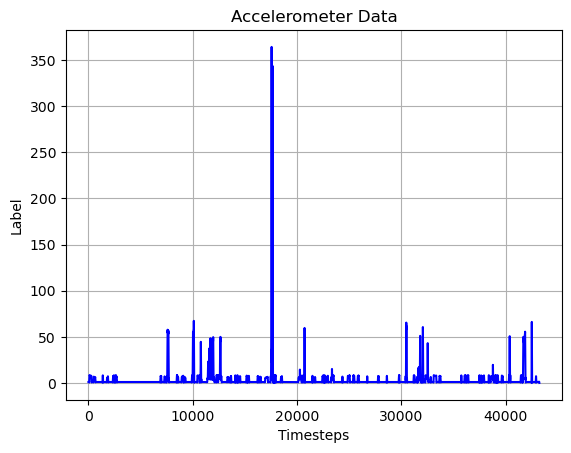

Thresholding
Feature extraction


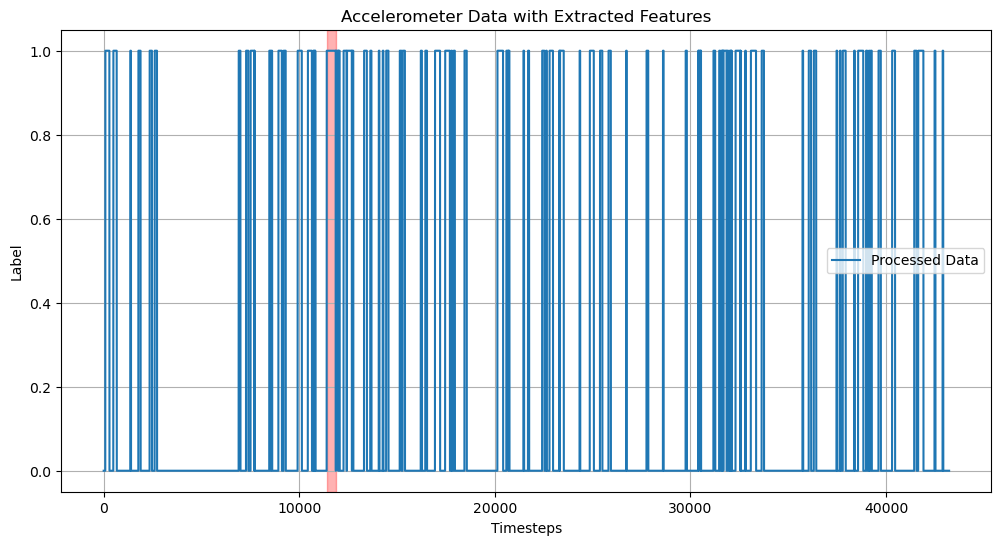

In [4]:
# Run this cell if you want to preprocess acc data
ACC_DATA_PATH = "data/accelerometer_data/803_1_accelerometer.pkl"

accelerometer_loader = AccelerometerPreprocessor(ACC_DATA_PATH, frequency=100)
accelerometer_loader.preprocess_data()
accelerometer_loader.save_features()
accelerometer_loader.visualize_features()
timestamps = accelerometer_loader.features

In [2]:
# run this cell if you already saved processed acc data
TIMESTAMPS_PATH = "processed/accelerometer_data/802_2_accelerometer_features.txt"
timestamps = []
with open(TIMESTAMPS_PATH, 'r') as file:
    for line in file:
        timestamps.append(tuple(int(x.strip()) for x in line.split(',')))

In [6]:
# Run this cell if you want to preprocess eeg data
EEG_DATA_PATH = "data/eeg_data/803_1_PD_REST-epo.fif"

eeg_loader = EEGPreprocessor(EEG_DATA_PATH)
eeg_loader.preprocess()
epochs_dict = eeg_loader.segment_with_labels(timestamps, save=True)  
eeg_loader.plot_epochs()

Opening raw data file data/eeg_data/803_1_PD_REST-epo.fif...
Isotrak not found
    Range : 0 ... 43224 =      0.000 ...    86.448 secs
Ready.
Reading 0 ... 43224  =      0.000 ...    86.448 secs...
Data loaded: <Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.

/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_preprocessor.py:29: RuntimeWarning: This filename (data/eeg_data/803_1_PD_REST-epo.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.data = mne.io.read_raw_fif(self.file_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Data filtered successfully
Applying ICA...
Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
ICA applied successfully.
[[ 9900     0     1]
 [11400     0     2]
 [11868     0     3]]
Extracted 3 events for segmentation.
Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 1501 original time points ...
0 bad epochs dropped
Epochs saved successfully as processed/eeg_data/803_1_PD_REST-epo.fif.
Using pyopengl with version 3.1.6


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [ ]:
# Run this cell if you already saved processed eeg data
EPOCHS_PATH = "processed/eeg_data/801_1_PD_REST-epo.fif"

eeg = EEGDataLoader(EPOCHS_PATH)
eeg.plot_epochs()
eeg.display_info()
eeg.get_labels()